# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


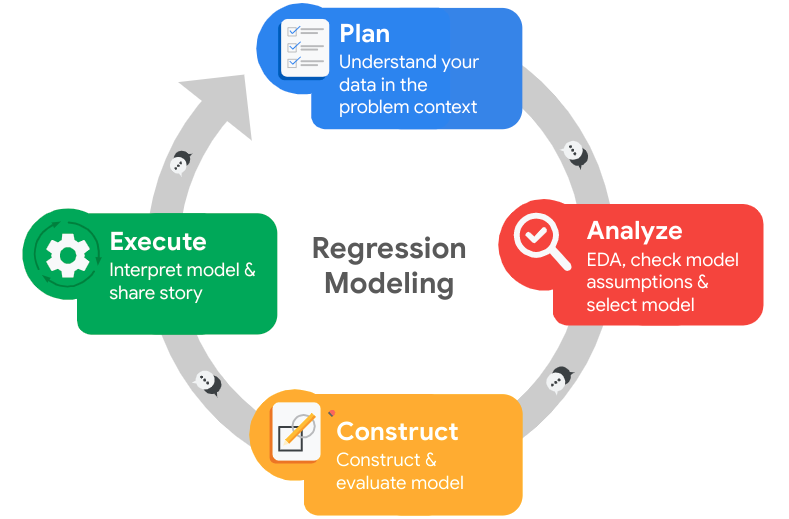

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- The stakeholders are members of the HR department at Salifort Motors
- I am trying to build a model to predict whether or not an employee will leave the company, and investigate possible causes for the companiy's high employee turnover rate


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [35]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={
    "average_montly_hours": "average_monthly_hours",
    "Work_accident": "work_accident",
    "Department": "department",
    "time_spend_company": "tenure"
})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

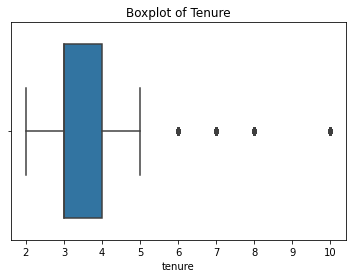

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1.tenure)
plt.title("Boxplot of Tenure")
plt.show()



In [12]:
# Determine the number of rows containing outliers
percentile25 = df1.tenure.quantile(0.25)
percentile75 = df1.tenure.quantile(0.75)
iqr = percentile75 - percentile25

lower_limit = percentile25 - (1.5 * iqr)
upper_limit = percentile75 + (1.5 * iqr)

outliers = df1[(df1.tenure < lower_limit) | (df1.tenure > upper_limit)]
num_outliers = len(outliers)
print("There are", num_outliers, "outliers in the dataset")


There are 824 outliers in the dataset


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print("Number of employees that left and stayed")
print(df1.left.value_counts())

# Get percentages of people who left vs. stayed
print("Percentage of employees that left and stayed")
print(df1.left.value_counts(normalize=True))

df_left = df1[df1.left == 1]
df_stayed = df1[df1.left == 0]

Number of employees that left and stayed
0    10000
1     1991
Name: left, dtype: int64
Percentage of employees that left and stayed
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

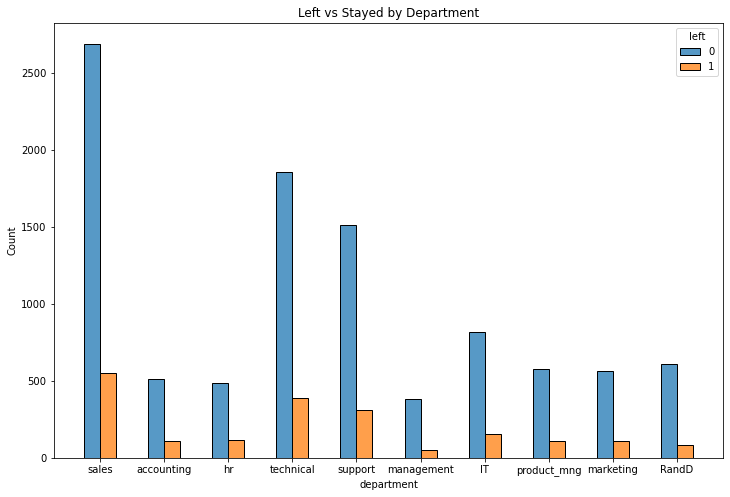

In [14]:
# Create a plot as needed
plt.figure(figsize=(12, 8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, multiple='dodge', shrink=0.5)
plt.title("Left vs Stayed by Department")
plt.show()

This plot shows that each department has a similar proportion of employees who left and stayed. This data feature is probably not a good predictor of employee turnover.

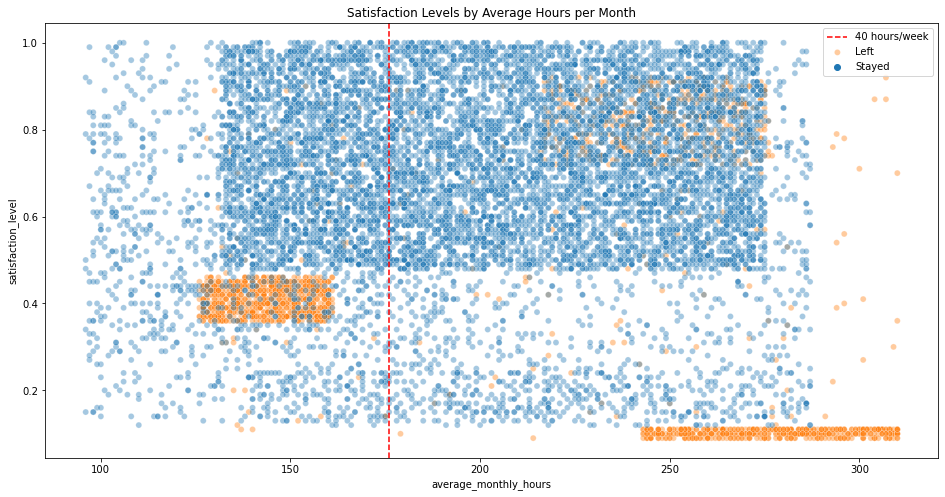

In [15]:
# Create a plot as needed

#average monthly hours assuming a 40 hour work week
average_hours = (30 - 8) * 8

plt.figure(figsize=(16, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(average_hours, color='red', ls='--')
plt.legend(['40 hours/week', 'Left', 'Stayed'])
plt.title("Satisfaction Levels by Average Hours per Month")
plt.show()

There appear to be two groups of employees that left in this plot.
- The first have mediocre satisfaction scores and work less than 40 hours per week. These are probably employees that were either fired or were transitioning out of the company. 
- The second group have the lowest satisfaction scores of all employees and work anywhere from 62 to 80 hours per week. These employees likely quit due to long work hours.
- The majority of employees in the company work more than 40 hours per week and have good satisfaction scores. Interestingly, there is a group of employees that left that have high satisfaction scores. However, they tend to work some of the longest hours.

Average monthly hours and satisfaction scores are worth considering as important predictive features.

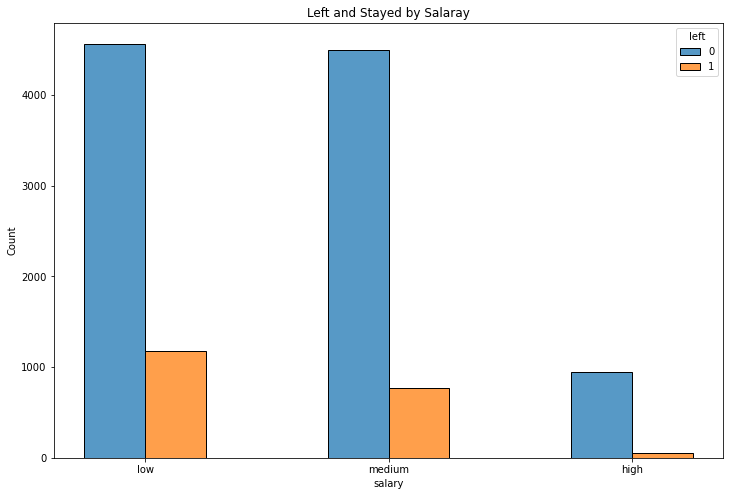

In [16]:
# Create a plot as needed
plt.figure(figsize=(12, 8))
sns.histplot(data=df1, x='salary', hue='left', discrete=1, multiple='dodge', shrink=0.5)
plt.title("Left and Stayed by Salaray")
plt.show()


The plot seems to indicate that higher salary levels are correlated with lower turnover numbers. This makes sense and may be a good predictor of employee turnover.

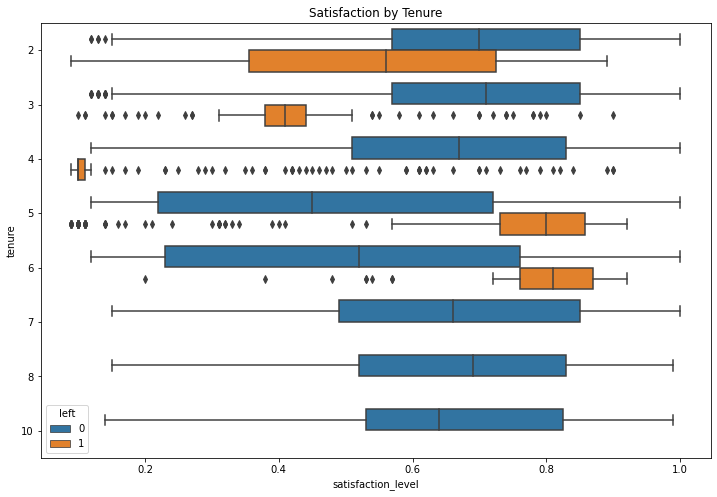

In [17]:
# Create a plot as needed
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient='h')
plt.title("Satisfaction by Tenure")
plt.show()

Like the scatter plot of monthly hours and satisfaction levels, this plot shows two groups of employees that left.
- The first is employees that had low satisfaction levels and short tenures of 2 to 3 years.
- The second group is employees with higher satisfaction levels and longer tenures of 5 to 6 years.
- The satisfaction levels among employees that left with a tenure of 4 years are unusually low.

Tenure is probably a good predictor of employee turnover.

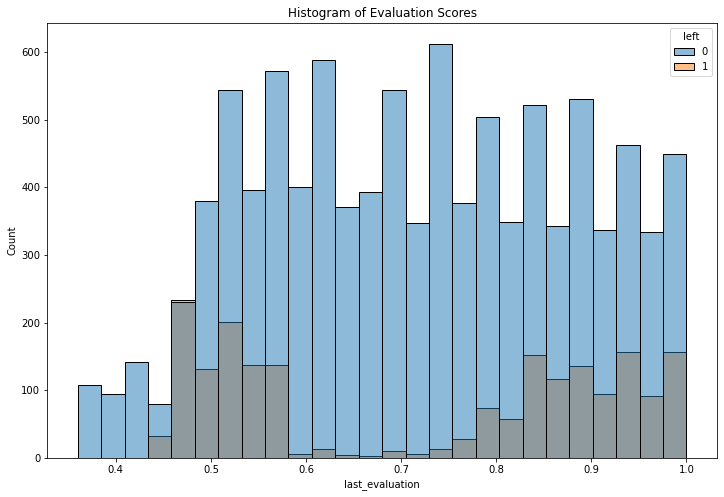

In [18]:
# Create a plot as needed
plt.figure(figsize=(12, 8))
sns.histplot(data=df1, x='last_evaluation', hue='left')
plt.title("Histogram of Evaluation Scores")
plt.show()

Most evaulation scores are average to very good. Among employees that left, the scores are either about average or very good. There are few employees that left that are between that range. This lines up with previous plots that showed two distinct groups of employees that left. The employees that left with average evaluation scores may have been fired or were transitioning out of the company. The employees that left with high evaulation scores probably quit. It would be worth investigating how monthly hours and evlatuation scores are related to confirm this interpretation.

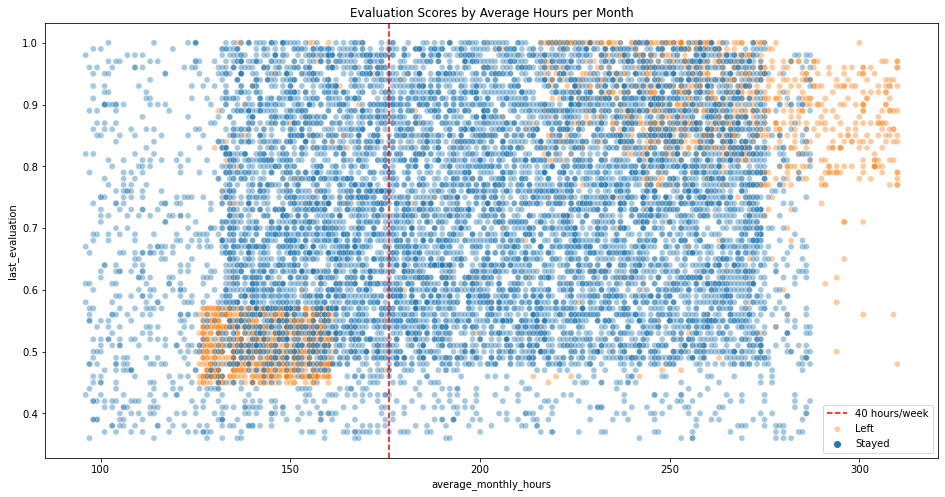

In [19]:
# Create a plot as needed
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(average_hours, color='red', ls='--')
plt.title("Evaluation Scores by Average Hours per Month")
plt.legend(['40 hours/week', 'Left', 'Stayed'])
plt.show()

This plot is similar to the scatterplot that visualizes average monthly hours and satisfaction levels, with two groups of employees that left.
- The first group have average evaluation scores and work less than 40 hours/week. They were probably fired or transitioning out of the company.
- The second group has high evaluation scores and long work hours, ranging from 230 to over 300 hours/month. They probably quit due to long hours.

Some additional takeaways:
- Most of the evaluation scores are above average regardless of monthly hours worked.
- All employees that worked 290 hours per month or more left, despite most of them having very high evaluation scores.
- Most employees work more than 40 hours per week on average.

For employees that leave, evaluation scores seem to be related to how many hours they work. The group with low hours are on the lower end of evaluation scores, while the group with high hours have some of the highest evaluation scores. This pattern is only true for employees that left. For employees that stayed, evaulation scores are evenly distributed across all work hours up until about 270 hours per month.

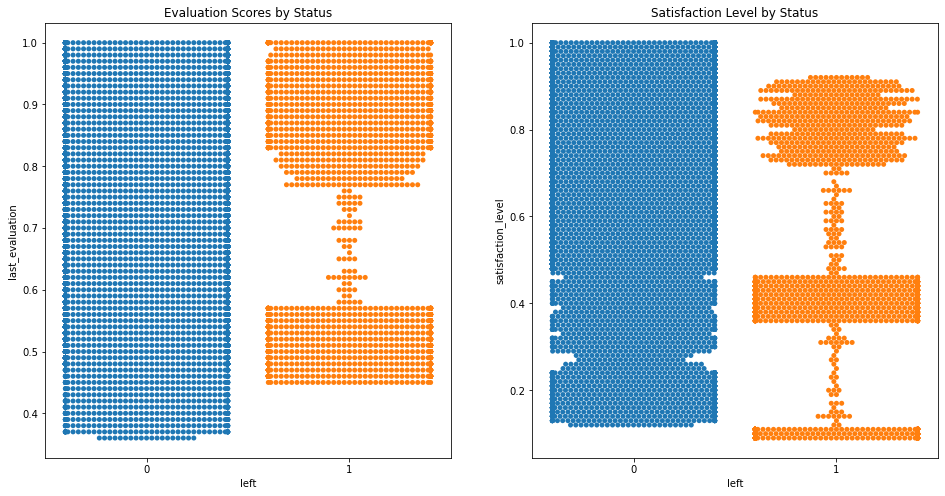

In [20]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.swarmplot(data=df1, x='left', y='last_evaluation', ax=ax[0])
ax[0].set_title('Evaluation Scores by Status')
sns.swarmplot(data=df1, x='left', y='satisfaction_level', ax=ax[1])
ax[1].set_title('Satisfaction Level by Status')
plt.show()

These plots more clearly show the distinct groups of employees that leave based on evaluation scores and satisfaction.
- The first plot shows two groups; one with medium evaluation scores and one with very high scores. There is a gap in the middle. The scores for the employees that stayed is uniform.
- The second plot shows our three groups based on satisfaction levels. The bottom group has very low satisfaction while the middle group has about medium satisfaction. The top group has very high satisfaction levels but left anyway. The satisfaction for employees that stayed is uniform.

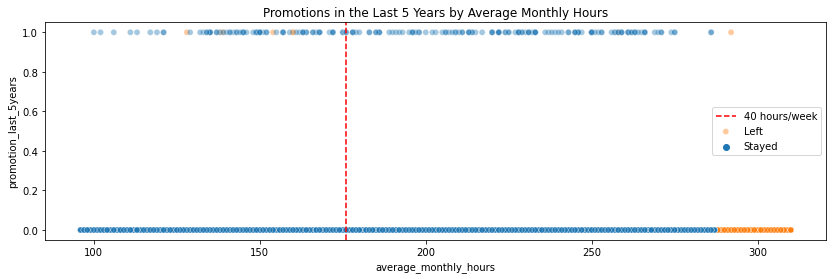

In [21]:
# Create a plot as needed
plt.figure(figsize=(14, 4))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.title('Promotions in the Last 5 Years by Average Monthly Hours')
plt.axvline(average_hours, color='red', ls='--')
plt.legend(['40 hours/week', 'Left', 'Stayed'])
plt.show()


- Most employees that have been promoted in the last 5 years have stayed with the company.
- Hours worked do not seem to affect promotions
- The employees that worked the most have not been promoted and have left the company

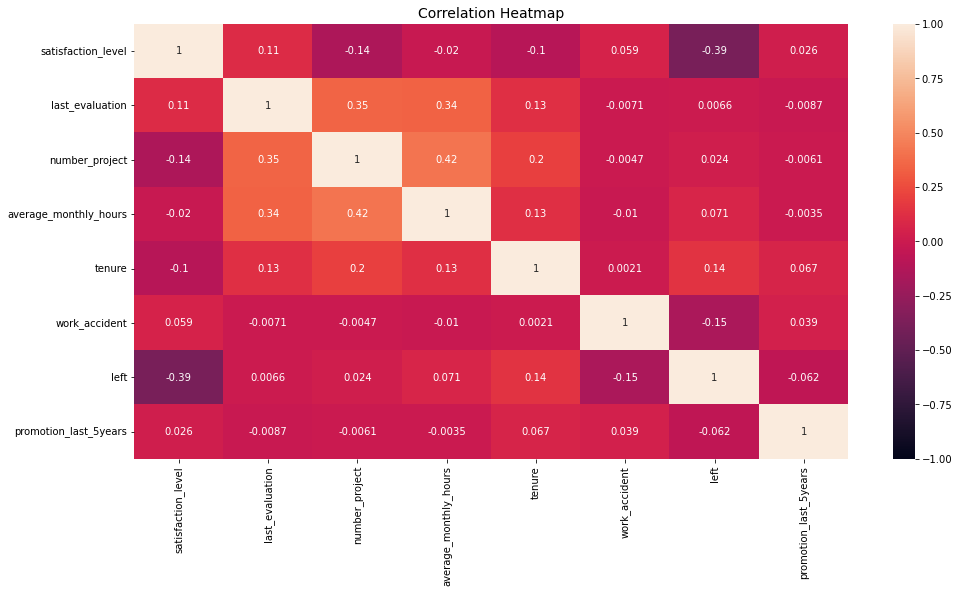

In [22]:
# Heat map
plt.figure(figsize=(16, 8))
sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

The heatmap shows a positive correlation between last evaluation, number of projects, and average monthly hours. The strongest correlation with whether or not an employee left is satisfaction level, which is a negavtive correlation.

### Insights

The plots show that many employees are leaving due to long work hours and low levels of job satisfaction. It's possible that this is compounded by the fact that none of the employees that work the longest hours have been promoted. This problem also seems to affect all departments in the company equally.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task is classification. We are predicting whether or not an employee will leave the company.

### Identify the types of models most appropriate for this task.

- Logistic regression model
- Tree-based machine learning model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
# Encode categorical variables
df_subset = df1.copy()

df_subset['salary'] = (df_subset['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

df_subset = pd.get_dummies(df_subset, drop_first=True)

df_subset.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary                       int8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [24]:
# Create target variable and predictor variables
y = df_subset['left']

X = df_subset.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [26]:
# Create random forest model
rf = RandomForestClassifier(random_state=0)

cv_params = {
    "max_depth": [4, 6, None],
    "max_features": [1.0],
    "max_samples": [0.5, 1.0],
    "n_estimators": [300, 500],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [1, 2, 3]
}

scoring = {"accuracy", "precision", "recall", "f1", "roc_auc"}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [27]:
%%time
# Fit the model
# rf_cv.fit(X_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [28]:
# Save the model with pickle
# with open('/home/jovyan/work/' + 'rf_cv' + '.pickle', 'wb') as to_write:
#     pickle.dump(rf_cv, to_write)

In [29]:
# Read in the model with pickle
with open('/home/jovyan/work/' + 'rf_cv.pickle', 'rb') as to_read:
    model = pickle.load(to_read)
rf_cv = model

In [30]:
# Best AUC score
rf_cv.best_score_

0.9802247734855483

In [31]:
# Best params
rf_cv.best_params_

{'max_depth': 6,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [32]:
# Function to extract model scores
def make_results(model_name:str, model_object, metric:str):
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [33]:
# Display results
rf_cv_results = make_results("Random Forest", rf_cv, "auc")
rf_cv_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest,0.975236,0.910228,0.941548,0.981234,0.980225


The model appears to be strong with an auc score of 0.98. The recall is 0.91, which means it correctly identifies 91% of employees who will leave and misses 9% of them.

In [49]:
# Define function to get test scores
def get_test_scores(model_name:str, model_object, X_test_data, y_test_data):
    

    y_preds = model_object.predict(X_test_data)

    accuracy = metrics.accuracy_score(y_test_data, y_preds)
    precision =  metrics.precision_score(y_test_data, y_preds)
    recall = metrics.recall_score(y_test_data, y_preds)
    F1 = metrics.f1_score(y_test_data, y_preds)
    auc =  metrics.roc_auc_score(y_test_data, y_preds)

    test_results = pd.DataFrame({
        "model": ["Random Forest"],
        "precision": [precision],
        "recall": [recall],
        "F1": [F1],
        "accuracy": [accuracy],
        "auc": [auc]
    })
    
    return test_results

In [50]:
# Display test scores
test_scores = get_test_scores("Random Forest", rf_cv, X_test, y_test)
test_scores

,model,precision,recall,F1,accuracy,auc
0,Random Forest,0.980978,0.907035,0.942559,0.981659,0.951768


The model performs similarly well to the test data. The recall and auc scores are lower but still indicate the model has strong predictive power.

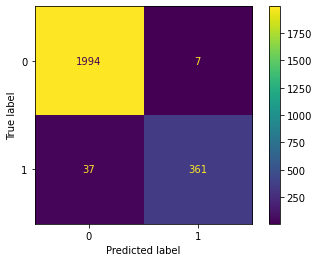

In [43]:
# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_preds, labels=rf_cv.classes_)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

disp.plot(values_format='')
plt.show()

The plot shows 361 true positives and 7 false positives, which explains the high precision score. There are 37 false negatives, which explains why the recall score is lower than the precision score. The model performs especially well when predicting employees who don't leave, with 1994 true negatives. This is an expected outcome because of the class imbalance. Employees who stay are the majority class. The model performs well when predicting employees who will leave based on these results.

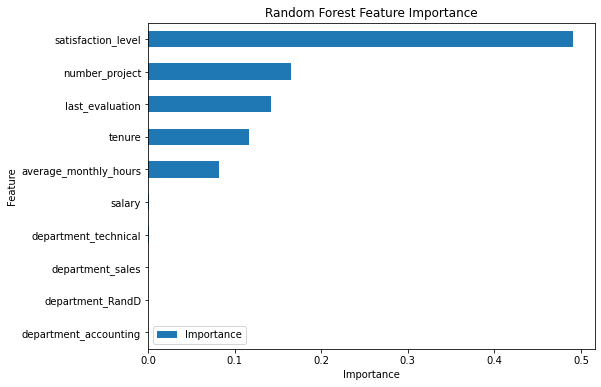

In [64]:
# Get feature importances
feature_importance = rf_cv.best_estimator_.feature_importances_

# Slice top 10 features based on index
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -10)[-10:]

# Column labels
feature = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feature_importance = feature_importance[ind]

axes = pd.DataFrame({"Feature": feature, "Importance": feature_importance})
axes_sorted = axes.sort_values("Importance")

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

axes_sorted.plot(kind='barh', ax=ax1, x="Feature", y="Importance")

ax1.set_title("Random Forest Feature Importance")
ax1.set_xlabel("Importance")
ax1.set_ylabel("Feature")

plt.show()

The plot shows that the most important features in the model were satisfaction level, number of projects, last evaluation score, and tenure. This result makes sense based on the EDA and visualizations done earlier.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The random forest model has an AUC score of 95.2%. It also has 98.1% precision, 90.7% recall, 94.3% F1, and 98.2% accuracy. The model performs well when predicting employees who leave, and is very good at predicting employees who stay.

### Conclusion, Recommendations, Next Steps

#### Conclusion and Recommendations
The EDA and modeling both show that employees who leave tend to be overworked.

Recommendations:
- Employees who work long hours should be rewarded for doing so to increase satisfaction levels
- The number of projects should be limited for each employee
- Evaluation scores should reflect performance and effort, with less consideration given to hours worked per month
- Each department should discuss work expectations and work culture since turnover is a problem across the company

#### Next Steps
It would be a good idea to conduct feature engineering on the data set in the future based on features that wouldn't usually be available when making predictions. Evaluation scores, monthly hours, and satisfaction levels may not always be present or up-to-date for all employees. Satisfaction level is self-reported, so it's reasonable to assume that not all employees will report it. It's also possible that employees may not accurately report their satisfaction levels. If that's the case, then using a model to predict satisfaction levels would be a good idea. It could be used to generate important data for the model made here.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.